In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt


# Exercise 1

In [180]:
df = pd.read_csv("https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/OnlineArrestData1980-2021.csv") # read in the data
df.head(10)

,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1980,Male,Black,Under 18,Alameda County,505,1351,188,26,79,2149,2286,295
1,1980,Male,Black,18 to 19,Alameda County,205,465,183,8,48,909,1333,0
2,1980,Male,Black,20 to 29,Alameda County,949,1593,606,27,178,3353,7974,0
3,1980,Male,Black,30 to 39,Alameda County,450,755,241,18,110,1574,4876,0
4,1980,Male,Black,40 to 69,Alameda County,172,218,117,11,66,584,3836,0
5,1980,Male,Black,70 and over,Alameda County,4,2,2,0,0,8,79,0
6,1980,Male,Hispanic,Under 18,Alameda County,151,365,40,9,77,642,1303,187
7,1980,Male,Hispanic,18 to 19,Alameda County,83,89,48,0,58,278,963,0
8,1980,Male,Hispanic,20 to 29,Alameda County,226,243,158,13,86,726,3748,0
9,1980,Male,Hispanic,30 to 39,Alameda County,59,80,41,8,33,221,1669,0


# Exercise 2

From the table, each row represent how many people have the relavant data values, for example, under F_drugoff, there are 188 felony males under age 18 in Alameda County. 

# Exericse 3

In [181]:
df1 = df.duplicated(["YEAR", "GENDER", "RACE", "AGE_GROUP", "COUNTY"]).sum()
assert not df1.any()

# Exercise 4

In [182]:
ex4_num_rows = df.groupby(["YEAR", "RACE", "COUNTY"], as_index=False).sum()
ex4_num_rows

/var/folders/k7/mj4xq7n54ls4p8zkcgghbg8c0000gn/T/ipykernel_11282/483026680.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ex4_num_rows = df.groupby(["YEAR", "RACE", "COUNTY"], as_index=False).sum()


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1980,Black,Alameda County,2594,5138,1489,94,541,9856,24081,555
1,1980,Black,Butte County,32,33,5,0,7,77,139,0
2,1980,Black,Calaveras County,0,0,0,0,0,0,7,0
3,1980,Black,Colusa County,0,5,0,0,0,5,13,0
4,1980,Black,Contra Costa County,720,1422,368,24,257,2791,5201,40
...,...,...,...,...,...,...,...,...,...,...,...
9697,2021,White,Tulare County,524,407,195,10,413,1549,3368,31
9698,2021,White,Tuolumne County,182,63,35,13,289,582,1393,2
9699,2021,White,Ventura County,574,372,308,13,672,1939,7509,18
9700,2021,White,Yolo County,171,163,51,8,173,566,1051,0


In [183]:
ex4_num_rows[ex4_num_rows['RACE'] == 'White']

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
170,1980,White,Alameda County,1179,3103,1650,119,767,6818,34455,1358
171,1980,White,Alpine County,1,9,2,1,0,13,117,0
172,1980,White,Amador County,9,58,12,3,5,87,283,0
173,1980,White,Butte County,235,614,136,18,184,1187,3897,3
174,1980,White,Calaveras County,44,117,81,3,27,272,628,3
...,...,...,...,...,...,...,...,...,...,...,...
9697,2021,White,Tulare County,524,407,195,10,413,1549,3368,31
9698,2021,White,Tuolumne County,182,63,35,13,289,582,1393,2
9699,2021,White,Ventura County,574,372,308,13,672,1939,7509,18
9700,2021,White,Yolo County,171,163,51,8,173,566,1051,0


# Exercise 5

In [184]:
ex5_collapsed_vars = ["AGE_GROUP", "GENDER"]
ex5_collapsed_vars 

['AGE_GROUP', 'GENDER']

# Exercise 6

In [185]:
violent_year = ex4_num_rows.groupby(['COUNTY', 'YEAR'])['VIOLENT'].transform('sum')
drug_year = ex4_num_rows.groupby(['COUNTY', 'YEAR'])['F_DRUGOFF'].transform('sum')
ex4_num_rows['total_violent_by_race'] = violent_year
ex4_num_rows['total_drug_by_race'] = drug_year
ex4_num_rows

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
0,1980,Black,Alameda County,2594,5138,1489,94,541,9856,24081,555,4504,3569
1,1980,Black,Butte County,32,33,5,0,7,77,139,0,306,149
2,1980,Black,Calaveras County,0,0,0,0,0,0,7,0,52,83
3,1980,Black,Colusa County,0,5,0,0,0,5,13,0,28,9
4,1980,Black,Contra Costa County,720,1422,368,24,257,2791,5201,40,1596,1089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,2021,White,Tulare County,524,407,195,10,413,1549,3368,31,2360,635
9698,2021,White,Tuolumne County,182,63,35,13,289,582,1393,2,229,44
9699,2021,White,Ventura County,574,372,308,13,672,1939,7509,18,1845,752
9700,2021,White,Yolo County,171,163,51,8,173,566,1051,0,480,92


# Exercise 7

In [186]:
# test: ex4_num_rows[(ex4_num_rows["COUNTY"] == "Alameda County") & (ex4_num_rows["YEAR"] == 1980)]
ala = ex4_num_rows.iloc[0]
ex7_alameda_1980_share_violent_arrestees_black = (ala["VIOLENT"] / ala["total_violent_by_race"]) * 100
ex7_alameda_1980_share_violent_arrestees_black

57.59325044404974

# Exercise 8

In [187]:
#Q2-1
ex4_num_rows_black = ex4_num_rows[ex4_num_rows['RACE'] == 'Black']
ex4_num_rows_black = ex4_num_rows_black[ex4_num_rows_black['F_TOTAL'] > 0]
ex4_num_rows_black.nunique().loc['COUNTY']

58

In [188]:
#Q2-2
ex4_num_rows_white = ex4_num_rows[ex4_num_rows['RACE'] == 'White']
ex4_num_rows_white = ex4_num_rows_white[ex4_num_rows_white['F_TOTAL'] > 0]
ex4_num_rows_white.nunique().loc['COUNTY']

58

In [189]:
# checks:
share1 = ex4_num_rows["VIOLENT"]/ex4_num_rows["total_violent_by_race"] * 100
share2 = ex4_num_rows["F_DRUGOFF"]/ex4_num_rows["total_drug_by_race"] * 100
print(share2/share1)

0       0.724397
1       0.320889
2            NaN
3            NaN
4       0.749066
          ...   
9697    1.383062
9698    1.000874
9699    1.316489
9700    1.556064
9701    1.002492
Length: 9702, dtype: float64


In [190]:
black = ex4_num_rows[(ex4_num_rows["RACE"] == "Black")].nunique().COUNTY
print(black)
white = ex4_num_rows[(ex4_num_rows["RACE"] == "White")].nunique().COUNTY
print(white)

## There are 58 counties in California.


58
58


# Exercise 9

In [191]:
black1 = ex4_num_rows[(ex4_num_rows["RACE"] == "Black")].groupby("COUNTY").count().sort_values(by="YEAR", ascending=True).head(10)
black1

,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
COUNTY,,,,,,,,,,,,
Alpine County,30,30,30,30,30,30,30,30,30,30,30,30
Sierra County,31,31,31,31,31,31,31,31,31,31,31,31
Modoc County,38,38,38,38,38,38,38,38,38,38,38,38
Trinity County,38,38,38,38,38,38,38,38,38,38,38,38
Amador County,41,41,41,41,41,41,41,41,41,41,41,41
Mono County,41,41,41,41,41,41,41,41,41,41,41,41
Mariposa County,41,41,41,41,41,41,41,41,41,41,41,41
San Luis Obispo County,42,42,42,42,42,42,42,42,42,42,42,42
San Joaquin County,42,42,42,42,42,42,42,42,42,42,42,42


In [192]:
black2 = ex4_num_rows[(ex4_num_rows["RACE"] == "Black")].groupby("COUNTY").count().YEAR
black2.value_counts()


42    51
41     3
38     2
30     1
31     1
Name: YEAR, dtype: int64

In [193]:
white1 = ex4_num_rows[(ex4_num_rows["RACE"] == "White")].groupby("COUNTY").count().sort_values(by="YEAR", ascending=True).head(10)

In [194]:
white2 = ex4_num_rows[(ex4_num_rows["RACE"] == "White")].groupby("COUNTY").count().YEAR
white2.value_counts()


42    58
Name: YEAR, dtype: int64

In [195]:
Other1 = ex4_num_rows[(ex4_num_rows["RACE"] == "Other")].groupby("COUNTY").count().sort_values(by="YEAR", ascending=True).head(5)
Other1

,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
COUNTY,,,,,,,,,,,,
Sierra County,40,40,40,40,40,40,40,40,40,40,40,40
Alameda County,42,42,42,42,42,42,42,42,42,42,42,42
Plumas County,42,42,42,42,42,42,42,42,42,42,42,42
Riverside County,42,42,42,42,42,42,42,42,42,42,42,42
Sacramento County,42,42,42,42,42,42,42,42,42,42,42,42


In [196]:
Other2 = ex4_num_rows[(ex4_num_rows["RACE"] == "Other")].groupby("COUNTY").count().YEAR
Other2.value_counts()


42    57
40     1
Name: YEAR, dtype: int64

In [197]:
Hispanic1 = ex4_num_rows[(ex4_num_rows["RACE"] == "Hispanic")].groupby("COUNTY").count().sort_values(by="YEAR", ascending=True).head(5)

In [198]:
Hispanic2 = ex4_num_rows[(ex4_num_rows["RACE"] == "Hispanic")].groupby("COUNTY").count().YEAR
Hispanic2.value_counts()

42    57
36     1
Name: YEAR, dtype: int64

For the results above, I think in the Black race, they don't have same number of counties in the county of Alpine County, Sierra County, Modoc County, Trinity County, Amador County, Mono County and Mariposa County; in the white race, they have same number of couties; in the other race, they don't have the same number of counties in Sierra County; in the hispanic race, they don't have the same number of counties in Alpine County. I think the reason is that there are majority race of white in Alpine counties because it shows that three races besides for white, other racial people in Alpine county don't have same number of counties. And I think Sierra county may consist of white and hispanic people mostly. Also for other counties that lack of Black people, I think they have major races in White, Hispanic and other race. 

# Exercise 10

In [199]:
black1

,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
COUNTY,,,,,,,,,,,,
Alpine County,30,30,30,30,30,30,30,30,30,30,30,30
Sierra County,31,31,31,31,31,31,31,31,31,31,31,31
Modoc County,38,38,38,38,38,38,38,38,38,38,38,38
Trinity County,38,38,38,38,38,38,38,38,38,38,38,38
Amador County,41,41,41,41,41,41,41,41,41,41,41,41
Mono County,41,41,41,41,41,41,41,41,41,41,41,41
Mariposa County,41,41,41,41,41,41,41,41,41,41,41,41
San Luis Obispo County,42,42,42,42,42,42,42,42,42,42,42,42
San Joaquin County,42,42,42,42,42,42,42,42,42,42,42,42


In [200]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Alpine County") & (ex4_num_rows["RACE"] == "Black")]

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
916,1984,Black,Alpine County,0,1,0,0,0,1,0,0,1,1
2062,1989,Black,Alpine County,1,0,0,0,0,1,1,0,5,4
2755,1992,Black,Alpine County,0,0,1,0,1,2,0,0,11,4
2986,1993,Black,Alpine County,0,0,0,0,0,0,1,0,3,7
3217,1994,Black,Alpine County,0,0,0,0,0,0,1,0,9,3
3449,1995,Black,Alpine County,0,0,0,0,0,0,5,0,14,12
3680,1996,Black,Alpine County,0,1,0,0,0,1,2,0,13,10
4142,1998,Black,Alpine County,0,0,0,0,0,0,1,0,7,11
4374,1999,Black,Alpine County,0,0,1,0,0,1,0,0,9,22
4606,2000,Black,Alpine County,0,0,0,0,0,0,2,0,6,11


In [201]:
# fill in the value for Alpine county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [1980,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1981,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1982,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1983,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1985,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1986,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1987,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1988,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1990,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1991,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1997,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [2001,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0]




In [202]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Alpine County") & (ex4_num_rows["RACE"] == "Black")].sort_values(by="YEAR", ascending=True).head(5)


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
9702,1980,Black,Alpine County,0,0,0,0,0,0,0,0,0,0
9703,1981,Black,Alpine County,0,0,0,0,0,0,0,0,0,0
9704,1982,Black,Alpine County,0,0,0,0,0,0,0,0,0,0
9705,1983,Black,Alpine County,0,0,0,0,0,0,0,0,0,0
916,1984,Black,Alpine County,0,1,0,0,0,1,0,0,1,1


In [203]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Sierra County") & (ex4_num_rows["RACE"] == "Black")]

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
728,1983,Black,Sierra County,1,1,0,0,0,2,0,0,10,15
1187,1985,Black,Sierra County,0,2,1,0,0,3,5,0,17,25
1416,1986,Black,Sierra County,0,0,0,0,0,0,0,0,8,15
1644,1987,Black,Sierra County,1,0,0,0,0,1,2,0,20,20
1874,1988,Black,Sierra County,0,0,0,0,0,0,2,0,13,16
2106,1989,Black,Sierra County,0,0,0,0,0,0,1,0,13,7
2567,1991,Black,Sierra County,0,0,2,0,0,2,0,0,18,22
3261,1994,Black,Sierra County,0,1,0,0,0,1,2,0,14,14
3492,1995,Black,Sierra County,0,0,0,0,0,0,0,0,13,8
3954,1997,Black,Sierra County,0,0,0,0,0,0,1,0,17,14


In [204]:
# fill in the value for Sierra county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [1980,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1981,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1982,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1984,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1990,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1992,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1993,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1996,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [2011,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [2012,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [2014,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0]





In [205]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Sierra County") & (ex4_num_rows["RACE"] == "Black")].sort_values(by="YEAR", ascending=True).head(5)

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
9714,1980,Black,Sierra County,0,0,0,0,0,0,0,0,0,0
9715,1981,Black,Sierra County,0,0,0,0,0,0,0,0,0,0
9716,1982,Black,Sierra County,0,0,0,0,0,0,0,0,0,0
728,1983,Black,Sierra County,1,1,0,0,0,2,0,0,10,15
9717,1984,Black,Sierra County,0,0,0,0,0,0,0,0,0,0


In [206]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Modoc County") & (ex4_num_rows["RACE"] == "Black")]

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
22,1980,Black,Modoc County,0,1,0,0,0,1,1,0,18,5
251,1981,Black,Modoc County,0,2,0,0,0,2,1,0,20,5
707,1983,Black,Modoc County,0,1,0,0,0,1,0,0,19,17
938,1984,Black,Modoc County,0,0,0,0,0,0,5,0,25,27
1166,1985,Black,Modoc County,0,0,0,0,0,0,1,0,13,13
1853,1988,Black,Modoc County,0,2,0,0,0,2,0,0,27,32
2085,1989,Black,Modoc County,1,0,0,0,0,1,2,0,49,45
2316,1990,Black,Modoc County,0,2,0,0,0,2,3,0,32,74
2546,1991,Black,Modoc County,0,3,1,0,2,6,8,0,35,54
2778,1992,Black,Modoc County,3,1,0,1,0,5,2,0,55,16


In [207]:
# fill in the value for Modoc county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [1982,'Black','Modoc County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1986,'Black','Modoc County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1987,'Black','Modoc County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [2003,'Black','Modoc County',0,0,0,0,0,0,0,0,0,0]


In [208]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Modoc County") & (ex4_num_rows["RACE"] == "Black")].sort_values(by="YEAR", ascending=True).head(5)

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
22,1980,Black,Modoc County,0,1,0,0,0,1,1,0,18,5
251,1981,Black,Modoc County,0,2,0,0,0,2,1,0,20,5
9725,1982,Black,Modoc County,0,0,0,0,0,0,0,0,0,0
707,1983,Black,Modoc County,0,1,0,0,0,1,0,0,19,17
938,1984,Black,Modoc County,0,0,0,0,0,0,5,0,25,27


In [209]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Trinity County") & (ex4_num_rows["RACE"] == "Black")]

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
49,1980,Black,Trinity County,0,2,0,0,0,2,0,0,33,28
505,1982,Black,Trinity County,0,0,0,0,0,0,2,0,29,16
735,1983,Black,Trinity County,0,0,0,0,0,0,1,0,27,60
1194,1985,Black,Trinity County,2,0,0,0,0,2,0,0,21,45
1881,1988,Black,Trinity County,2,0,2,0,0,4,1,0,83,128
2113,1989,Black,Trinity County,1,1,0,0,0,2,2,0,97,68
2343,1990,Black,Trinity County,0,0,1,0,0,1,0,0,82,87
2574,1991,Black,Trinity County,1,0,2,0,0,3,1,0,99,113
2805,1992,Black,Trinity County,3,1,0,0,1,5,9,0,96,141
3036,1993,Black,Trinity County,0,1,1,0,0,2,1,0,98,142


In [210]:
# fill in the value for Modoc county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [1981,'Black','Trinity County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1984,'Black','Trinity County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1986,'Black','Trinity County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1987,'Black','Trinity County',0,0,0,0,0,0,0,0,0,0]



In [211]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Trinity County") & (ex4_num_rows["RACE"] == "Black")].sort_values(by="YEAR", ascending=True).head(5)

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
49,1980,Black,Trinity County,0,2,0,0,0,2,0,0,33,28
9729,1981,Black,Trinity County,0,0,0,0,0,0,0,0,0,0
505,1982,Black,Trinity County,0,0,0,0,0,0,2,0,29,16
735,1983,Black,Trinity County,0,0,0,0,0,0,1,0,27,60
9730,1984,Black,Trinity County,0,0,0,0,0,0,0,0,0,0


In [212]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Amador County") & (ex4_num_rows["RACE"] == "Black")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [1980,'Black','Amador County',0,0,0,0,0,0,0,0,0,0]

In [213]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Mono County") & (ex4_num_rows["RACE"] == "Black")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [1995,'Black','Mono County',0,0,0,0,0,0,0,0,0,0]

In [214]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Mariposa County") & (ex4_num_rows["RACE"] == "Black")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [1984,'Black','Mariposa County',0,0,0,0,0,0,0,0,0,0]

In [215]:
Other1

,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
COUNTY,,,,,,,,,,,,
Sierra County,40,40,40,40,40,40,40,40,40,40,40,40
Alameda County,42,42,42,42,42,42,42,42,42,42,42,42
Plumas County,42,42,42,42,42,42,42,42,42,42,42,42
Riverside County,42,42,42,42,42,42,42,42,42,42,42,42
Sacramento County,42,42,42,42,42,42,42,42,42,42,42,42


In [216]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Sierra County") & (ex4_num_rows["RACE"] == "Other")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [2000,'Other','Sierra County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [2013,'Other','Sierra County',0,0,0,0,0,0,0,0,0,0]

In [217]:
Hispanic1

,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
COUNTY,,,,,,,,,,,,
Alpine County,36,36,36,36,36,36,36,36,36,36,36,36
Alameda County,42,42,42,42,42,42,42,42,42,42,42,42
Plumas County,42,42,42,42,42,42,42,42,42,42,42,42
Riverside County,42,42,42,42,42,42,42,42,42,42,42,42
Sacramento County,42,42,42,42,42,42,42,42,42,42,42,42


In [218]:
ex4_num_rows[(ex4_num_rows["COUNTY"] == "Alpine County") & (ex4_num_rows["RACE"] == "Hispanic")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
ex4_num_rows.loc[len(ex4_num_rows)] = [1980,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1981,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1982,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1984,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1985,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0]
ex4_num_rows.loc[len(ex4_num_rows)] = [1986,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0]



In [219]:
## check if all races have same rows in counties 
print(ex4_num_rows[(ex4_num_rows["RACE"] == "Black")].groupby("COUNTY").count().YEAR.value_counts())
print(ex4_num_rows[(ex4_num_rows["RACE"] == "Other")].groupby("COUNTY").count().YEAR.value_counts())
print(ex4_num_rows[(ex4_num_rows["RACE"] == "Hispanic")].groupby("COUNTY").count().YEAR.value_counts())



42    58
Name: YEAR, dtype: int64
42    58
Name: YEAR, dtype: int64
42    58
Name: YEAR, dtype: int64


# Exerciese 11

In [220]:
ex4_num_rows[(ex4_num_rows["RACE"] == "White")].groupby("COUNTY").count().YEAR.value_counts()

42    58
Name: YEAR, dtype: int64

In [221]:
white_drug = ex4_num_rows[(ex4_num_rows["RACE"] == "White")]
white_drug['F_DRUGOFF']
ex11_white_drug_share = white_drug['F_DRUGOFF'].sum()/ ex4_num_rows['F_DRUGOFF'].sum()
ex11_white_drug_share

0.3826878719003257

In [222]:
Black_drug = ex4_num_rows[(ex4_num_rows["RACE"] == "Black")]
Black_drug['F_DRUGOFF']
ex11_black_drug_share = Black_drug['F_DRUGOFF'].sum()/ex4_num_rows['F_DRUGOFF'].sum()
ex11_black_drug_share

0.24363384618302633

# Exercise 12

In [223]:
Black_felony = ex4_num_rows[(ex4_num_rows["RACE"] == "Black")]
Black_felony['VIOLENT']
ex12_black_felony_share = Black_felony['VIOLENT'].sum()/ex4_num_rows['VIOLENT'].sum()
ex12_black_felony_share

0.25731636931707513

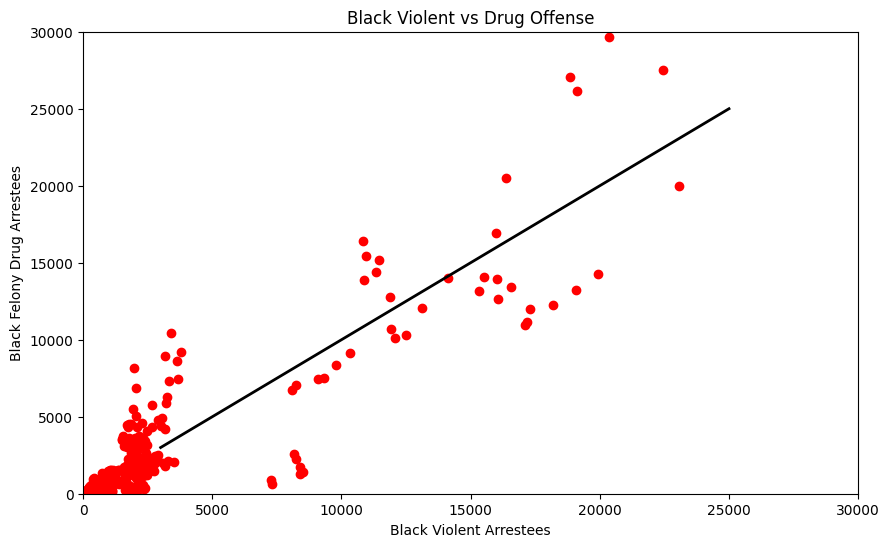

In [224]:
plt.figure(figsize=(10, 6))
plt.scatter(Black_drug['VIOLENT'], Black_drug['F_DRUGOFF'], color="red")
plt.plot([3000,25000],[3000,25000],color = 'black', linewidth = 2)
plt.xlim(0, 30000)
plt.ylim(0, 30000)
plt.title("Black Violent vs Drug Offense")
plt.xlabel("Black Violent Arrestees")
plt.ylabel("Black Felony Drug Arrestees")
plt.show()


From the graph above, it shows that the felony drug arrestees and violent arrestees have positive relationship and look proportionate mostly. 

In [239]:
black_data = ex4_num_rows[ex4_num_rows["RACE"] == "Black"]
b1 = black_data["VIOLENT"].sum()/black_data["F_TOTAL"].sum()
b2 = black_data["F_DRUGOFF"].sum()/black_data["F_TOTAL"].sum()
ex12_proportionate = b1/b2
ex12_proportionate


1.1176110845841378

From the results, I think the black arrestees make up a greater share of violent arrestees. 

In [231]:
results = {'ex4_num_rows': ex4_num_rows, 'ex5_collapsed_vars': ex5_collapsed_vars,  'ex7_alameda_1980_share_violent_arrestees_black': ex7_alameda_1980_share_violent_arrestees_black,
'ex11_white_drug_share': ex11_white_drug_share, 
'ex11_black_drug_share': ex11_black_drug_share, 
'ex12_proportionate': ex12_proportionate}



In [ ]:
assert set(results.keys()) == {
    "ex4_num_rows",
    "ex5_collapsed_vars",
    "ex7_alameda_1980_share_violent_arrestees_black",
    "ex11_white_drug_share",
    "ex11_black_drug_share",
    "ex12_proportionate",
}